# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# import pritty print for testing
from pprint import pprint

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

        
# Group cities in sets of 50 for logging purposes

# Create endpoint URL with each city
city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
# Log the url, record, and set numbers
print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

# Add 1 to the record count
record_count += 1

city = cities[2]

# Run an API request for each of the cities
try:
    # Parse the JSON and retrieve data
   city_weather = requests.get(city_url + city).json()

    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
   city_lat = city_weather['coord']['lat']
   city_lng = city_weather['coord']['lon']
   city_max_temp = city_weather['main']['temp_max']
   city_humidity = city_weather['main']['humidity']
   city_clouds = city_weather['clouds']['all']
   city_wind = city_weather['wind']['speed']
   city_country = city_weather['sys']['country']
   city_date = city_weather['dt']
   # Append the City information into city_data list
   city_data.append({"City": city, 
                  "Lat": city_lat, 
                      "Lng": city_lng, 
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})
   # If an error is experienced, skip the city
except:
    print("City not found. Skipping...")
    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
pprint(city_weather)
temp_test = city_weather['dt']

print(f"City Clouds: {temp_test}")

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -17.5065, 'lon': -149.489},
 'dt': 1702759211,
 'id': 4034307,
 'main': {'feels_like': 34.72,
          'humidity': 70,
          'pressure': 1012,
          'temp': 29.87,
          'temp_max': 29.87,
          'temp_min': 29.87},
 'name': 'Mahina',
 'sys': {'country': 'PF',
         'id': 7318,
         'sunrise': 1702739912,
         'sunset': 1702787323,
         'type': 1},
 'timezone': -36000,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 220, 'speed': 4.12}}
City Clouds: 1702759211


In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | crane
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | mahina
Processing Record 4 of Set 1 | bazarak
Processing Record 5 of Set 1 | conde
Processing Record 6 of Set 1 | isafjordur
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | naze
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | malango
Processing Record 11 of Set 1 | saint-joseph
Processing Record 12 of Set 1 | fang
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | pikalevo
Processing Record 16 of Set 1 | xilin hot
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | san andres
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | caleta de carquin
Processing Record 21 of Set 1 | gamba
Processing Record 22 of Set 1 | rosa zarate
Processing Record 23 of Set 

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,crane,31.3974,-102.3501,16.02,19,0,3.31,US,1702759399
1,port-aux-francais,-49.3500,70.2167,6.37,87,97,11.11,TF,1702759386
2,mahina,-17.5065,-149.4890,29.87,70,20,4.12,PF,1702759211
3,bazarak,35.3129,69.5152,-2.18,77,26,4.56,AF,1702759461
4,conde,-7.2597,-34.9075,26.70,78,0,6.17,BR,1702759461


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,crane,31.3974,-102.3501,16.02,19,0,3.31,US,1702759399
1,port-aux-francais,-49.3500,70.2167,6.37,87,97,11.11,TF,1702759386
2,mahina,-17.5065,-149.4890,29.87,70,20,4.12,PF,1702759211
3,bazarak,35.3129,69.5152,-2.18,77,26,4.56,AF,1702759461
4,conde,-7.2597,-34.9075,26.70,78,0,6.17,BR,1702759461


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

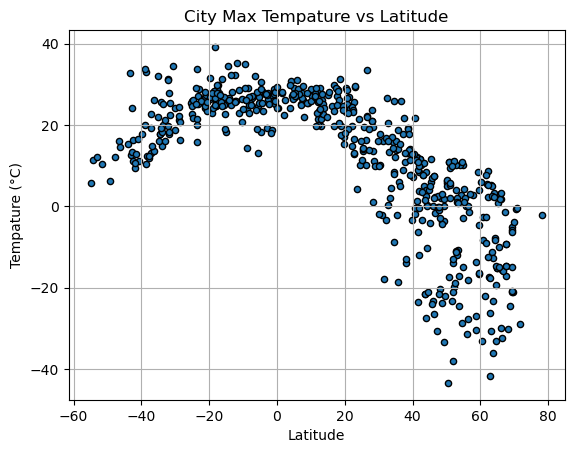

In [18]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter",
    x= "Lat", y = "Max Temp",
    edgecolors= 'black')



# Incorporate the other graph properties
plt.title("City Max Tempature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel(f"Tempature (\N{Degree Sign}C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

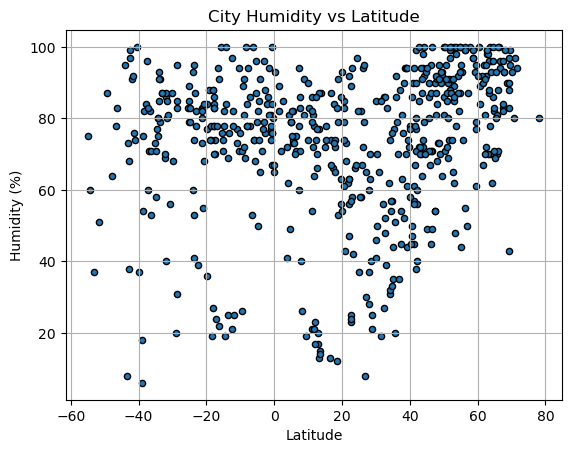

In [19]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter",
    x= "Lat", y = "Humidity",
    edgecolors= 'black')



# Incorporate the other graph properties
plt.title("City Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

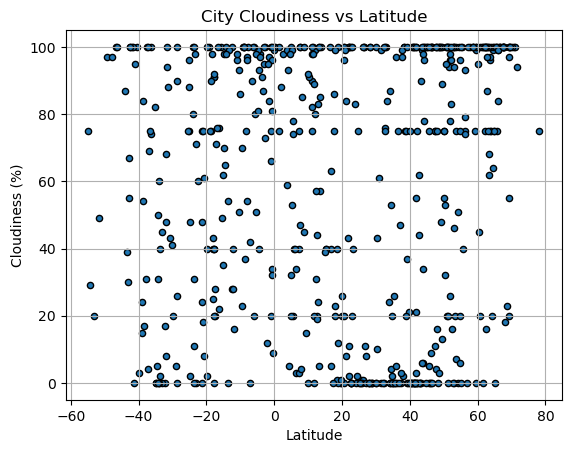

In [20]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter",
    x= "Lat", y = "Cloudiness",
    edgecolors= 'black')



# Incorporate the other graph properties
plt.title("City Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

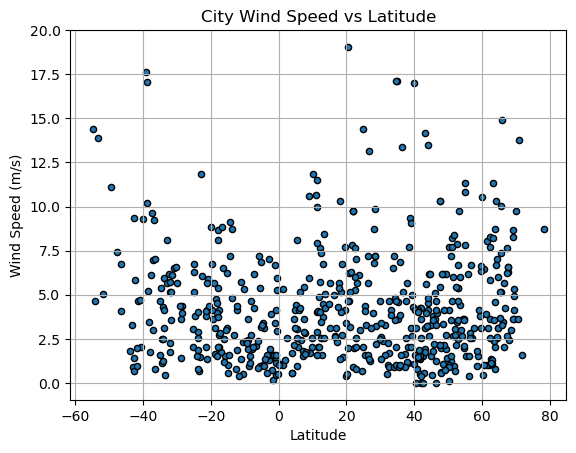

In [21]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter",
    x= "Lat", y = "Wind Speed",
    edgecolors= 'black')



# Incorporate the other graph properties
plt.title("City Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,crane,31.3974,-102.3501,16.02,19,0,3.31,US,1702759399
3,bazarak,35.3129,69.5152,-2.18,77,26,4.56,AF,1702759461
5,isafjordur,66.0755,-23.1240,1.71,88,99,3.47,IS,1702759388
7,naze,28.3667,129.4833,13.51,70,100,9.85,JP,1702759437
11,fang,19.9169,99.2145,17.01,93,20,0.38,TH,1702759462


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat']<=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,6.37,87,97,11.11,TF,1702759386
2,mahina,-17.5065,-149.4890,29.87,70,20,4.12,PF,1702759211
4,conde,-7.2597,-34.9075,26.70,78,0,6.17,BR,1702759461
6,avarua,-21.2078,-159.7750,27.03,83,75,4.12,CK,1702759392
8,adamstown,-25.0660,-130.1015,22.80,79,96,6.29,PN,1702759388


###  Temperature vs. Latitude Linear Regression Plot

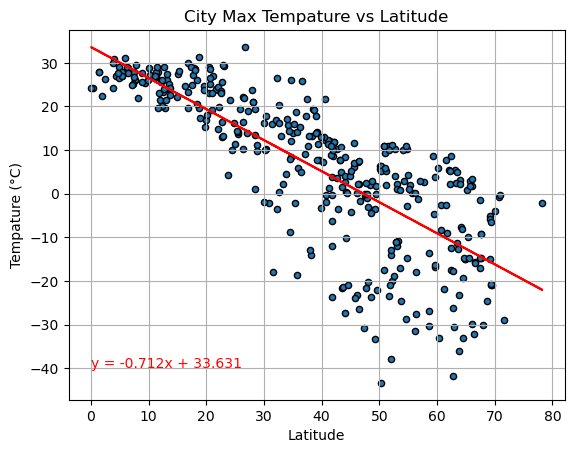

In [24]:
# Linear regression on Northern Hemisphere
plot = northern_hemi_df.plot(kind="scatter",
    x= "Lat", y = "Max Temp",
    edgecolors= 'black')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.title("City Max Tempature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel(f"Tempature (\N{Degree Sign}C)")
plt.annotate(f"y = {round(slope,3)}x + {round(intercept,3)}",(0,-40),fontsize=10,color="red")
plt.grid()

plt.show()

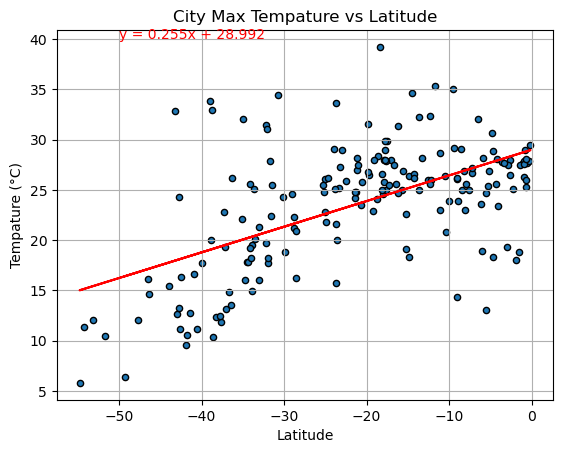

In [25]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot(kind="scatter",
    x= "Lat", y = "Max Temp",
    edgecolors= 'black')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept

plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,3)}x + {round(intercept,3)}",(-50,40),fontsize=10,color="red")

plt.title("City Max Tempature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel(f"Tempature (\N{Degree Sign}C)")

plt.grid()

plt.show()

**Discussion about the linear relationship:** The Linear Relation this is that Closer to the equator or Zero Degrees Latitude , the higher the maximum tempature and the correlation is better in the Northern hemisphere than in the southern hemispere

### Humidity vs. Latitude Linear Regression Plot

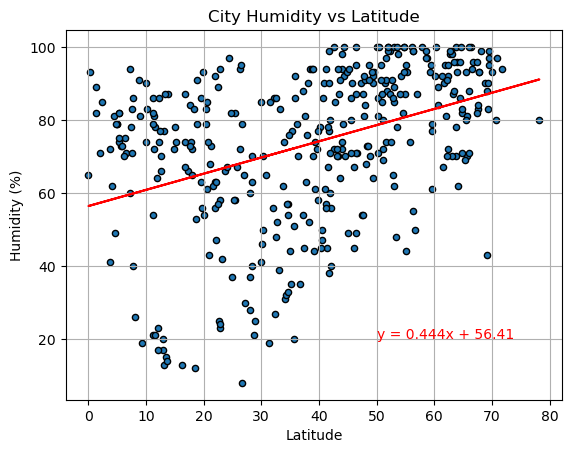

In [26]:
# Northern Hemisphere
plot = northern_hemi_df.plot(kind="scatter",
    x= "Lat", y = "Humidity",
    edgecolors= 'black')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,3)}x + {round(intercept,3)}",(50,20),fontsize=10,color="red")

plt.title("City Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.show()

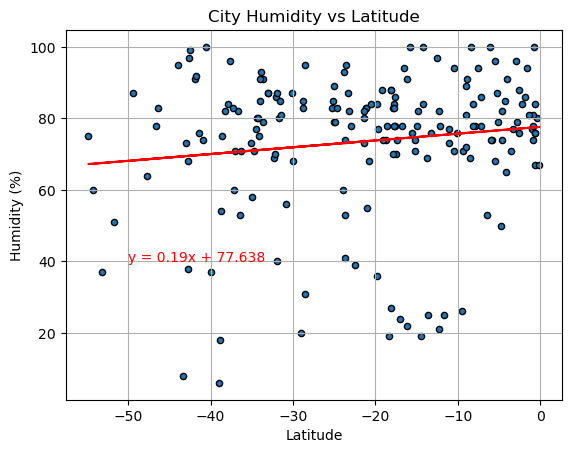

In [27]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
southern_hemi_df.plot(kind="scatter",
    x= "Lat", y = "Humidity",
    edgecolors= 'black')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept

plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,3)}x + {round(intercept,3)}",(-50,40),fontsize=10,color="red")

plt.title("City Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere there is a relationship between latitude and humidity. Humidity increases with latitude.
In the Southern Hemisphere there looks to be no relationship between latitude and humididty

### Cloudiness vs. Latitude Linear Regression Plot

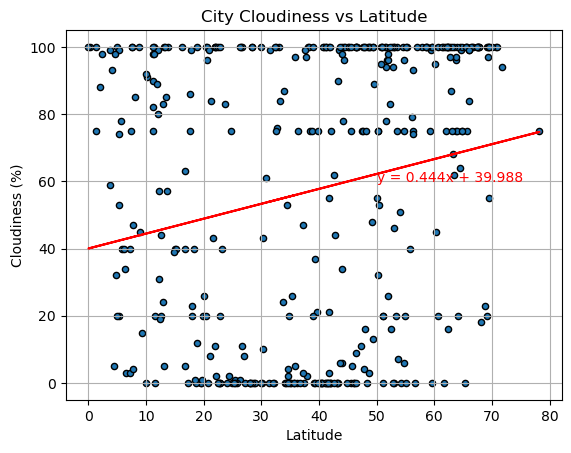

In [28]:
# Northern Hemisphere
plot = northern_hemi_df.plot(kind="scatter",
    x= "Lat", y = "Cloudiness",
    edgecolors= 'black')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,3)}x + {round(intercept,3)}",(50,60),fontsize=10,color="red")

plt.title("City Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.show()

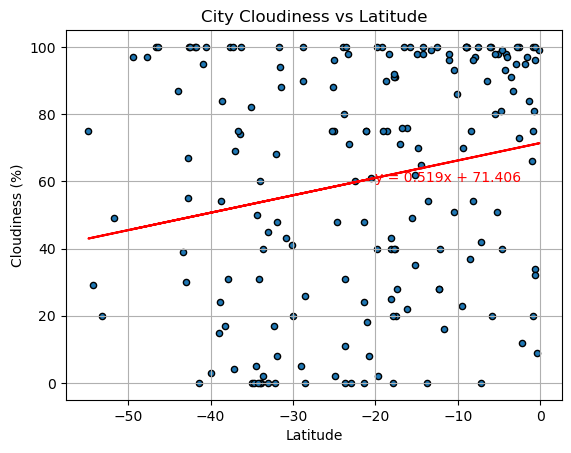

In [29]:
# Southern Hemisphere
southern_hemi_df.plot(kind="scatter",
    x= "Lat", y = "Cloudiness",
    edgecolors= 'black')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept

plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,3)}x + {round(intercept,3)}",(-20,60),fontsize=10,color="red")

plt.title("City Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.show()

**Discussion about the linear relationship:** There is a liner correlation between cloudness and Latitude but it is not strong. In the Northern Hemiphere, cloundies increases as the city gets future from the equator but in the Southern hempispherem cloundies decreases as the city gets future from the equator

### Wind Speed vs. Latitude Linear Regression Plot

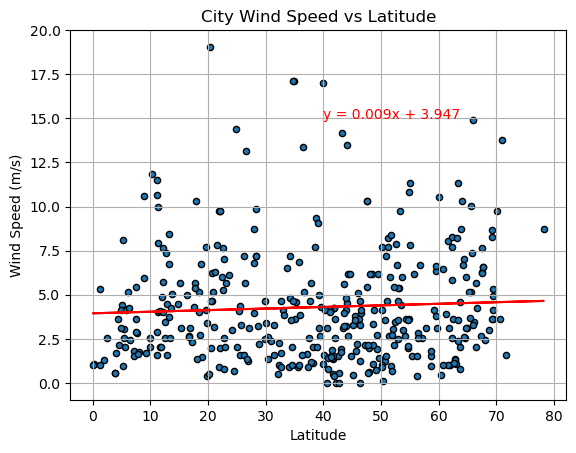

In [30]:
# Northern Hemisphere
plot = northern_hemi_df.plot(kind="scatter",
    x= "Lat", y = "Wind Speed",
    edgecolors= 'black')

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,3)}x + {round(intercept,3)}",(40,15),fontsize=10,color="red")

plt.title("City Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

plt.show()

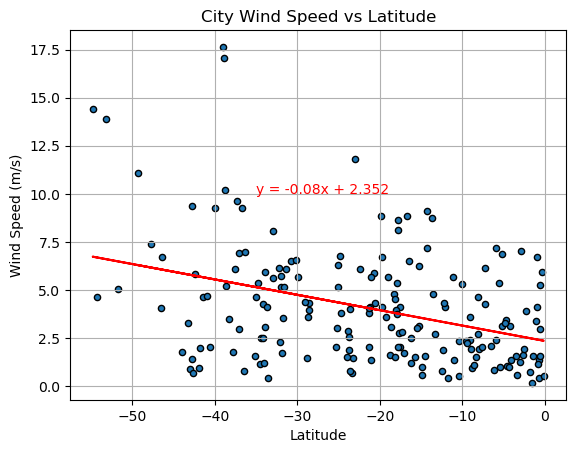

In [31]:
# Southern Hemisphere
# Northern Hemisphere
plot = southern_hemi_df.plot(kind="scatter",
    x= "Lat", y = "Wind Speed",
    edgecolors= 'black')

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept

plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,3)}x + {round(intercept,3)}",(-35,10),fontsize=10,color="red")

plt.title("City Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

plt.show()

**Discussion about the linear relationship:** There is a liner correlation between cloudness and Latitude but it is not strong. In the Northern Hemiphere, wind speed stays the same as the city gets future from the equator but in the Southern hempispherem wind speed increases as the city gets future from the equator